<a href="https://colab.research.google.com/github/Harish443/Forecasting_sales/blob/main/wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

In [ ]:
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/traineee.csv')
stores = pd.read_csv('drive/MyDrive/stores.csv')
features = pd.read_csv('drive/MyDrive/features.csv')

# Exploratory analysis of dataset

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
data.shape

(421570, 5)

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
features.shape

(8190, 12)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


# Handling missing values of features dataset

In [ ]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [ ]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Merging Datasets

In [ ]:
data = pd.merge(data,stores,on='Store',how='right')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [ ]:
data = pd.merge(data,features,on=['Store','Date'],how='left')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.sort_values(by=['Date'],inplace=True)

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
2012-10-26,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
2012-10-26,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


# Outlier Detection

In [ ]:
o_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
o_data.isnull().sum()
o_data

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.480,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.850,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.850,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.960,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.420,11330.286495
...,...,...,...,...,...,...,...
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542


In [ ]:
store_data = pd.merge(left=data,right=o_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,False,57592.12,14537.37,22513.322937,18535.480,9854.349032
2010-02-05,9,97,2010-02-05,668.48,False,B,125833,38.01,2.572,0.00,...,0.00,0.00,214.655459,6.415,False,766.93,-9.92,372.655556,371.050,290.954675
2010-02-05,9,85,2010-02-05,693.87,False,B,125833,38.01,2.572,0.00,...,0.00,0.00,214.655459,6.415,False,2512.14,110.56,876.629441,824.040,307.436056
2010-02-05,8,80,2010-02-05,8654.60,False,A,155078,34.14,2.572,0.00,...,0.00,0.00,214.471451,6.299,False,11990.43,7414.43,9188.915105,9161.970,756.223236
2010-02-05,9,55,2010-02-05,11123.56,False,B,125833,38.01,2.572,0.00,...,0.00,0.00,214.655459,6.415,False,29166.26,4791.74,8607.050490,7571.600,3874.176095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,False,A,202307,69.79,3.506,6152.59,...,272.29,2924.15,223.078337,6.170,False,19679.04,4179.99,9347.725105,8762.990,2825.107609
2012-10-26,38,23,2012-10-26,53.12,False,C,39690,65.95,4.301,148.32,...,0.00,344.78,131.193097,10.199,False,289.78,3.50,37.848679,31.365,34.065601
2012-10-26,27,6,2012-10-26,5339.65,False,A,204184,58.99,4.071,7756.75,...,731.23,2174.84,142.762411,8.000,False,41005.33,2524.01,7730.729091,6798.780,5178.928257


In [ ]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,False,B,125833,38.01,2.572,214.655459,6.415,False,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,False,B,125833,38.01,2.572,214.655459,6.415,False,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,False,A,155078,34.14,2.572,214.471451,6.299,False,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,False,B,125833,38.01,2.572,214.655459,6.415,False,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,False,A,202307,69.79,3.506,223.078337,6.170,False,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,False,C,39690,65.95,4.301,131.193097,10.199,False,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,False,A,204184,58.99,4.071,142.762411,8.000,False,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
data.shape

(421533, 18)

In [ ]:
from scipy import stats
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape


(375438, 18)

# Data visualization

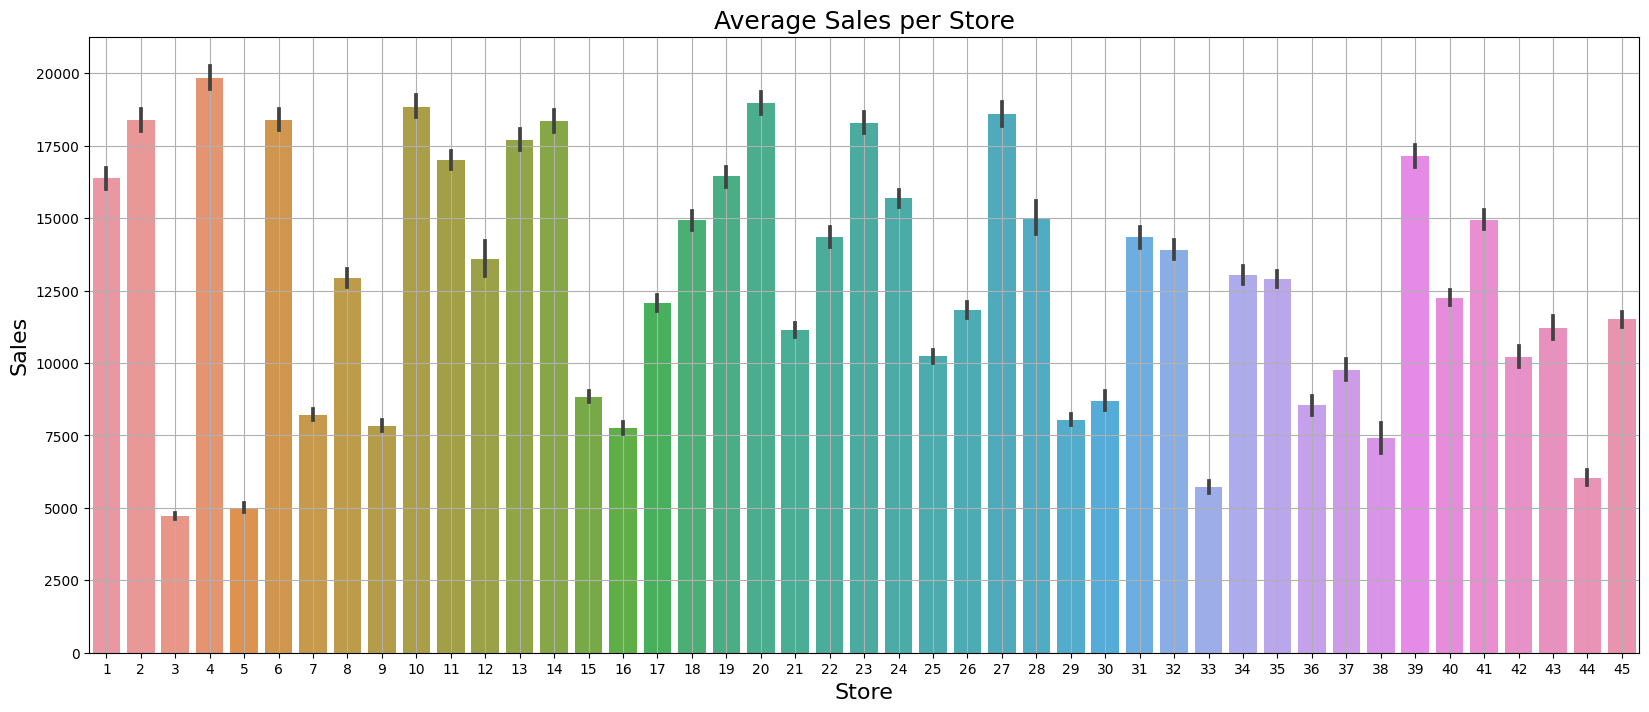

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()


,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data = pd.concat([data, data_cat],axis=1)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,97,2010-02-05,668.48,False,B,125833,38.01,2.572,214.655459,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,9,85,2010-02-05,693.87,False,B,125833,38.01,2.572,214.655459,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8,80,2010-02-05,8654.60,False,A,155078,34.14,2.572,214.471451,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,55,2010-02-05,11123.56,False,B,125833,38.01,2.572,214.655459,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,False,A,202307,69.79,3.506,223.078337,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,38,23,2012-10-26,53.12,False,C,39690,65.95,4.301,131.193097,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,27,6,2012-10-26,5339.65,False,A,204184,58.99,4.071,142.762411,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.shape

(375438, 147)

In [ ]:
data.drop(columns=cat_col,inplace=True)
data

,Date,Weekly_Sales,IsHoliday_x,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,max,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,2010-02-05,24924.50,False,151315,42.31,2.572,211.096358,8.106,False,57592.12,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,2010-02-05,668.48,False,125833,38.01,2.572,214.655459,6.415,False,766.93,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,2010-02-05,693.87,False,125833,38.01,2.572,214.655459,6.415,False,2512.14,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,2010-02-05,8654.60,False,155078,34.14,2.572,214.471451,6.299,False,11990.43,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,2010-02-05,11123.56,False,125833,38.01,2.572,214.655459,6.415,False,29166.26,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2012-10-26,9258.88,False,202307,69.79,3.506,223.078337,6.170,False,19679.04,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,2012-10-26,53.12,False,39690,65.95,4.301,131.193097,10.199,False,289.78,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,2012-10-26,5339.65,False,204184,58.99,4.071,142.762411,8.000,False,41005.33,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.drop(columns=['Date','IsHoliday_x','IsHoliday_y'],inplace=True)
data

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,max,min,mean,median,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,57592.12,14537.37,22513.322937,18535.480,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,766.93,-9.92,372.655556,371.050,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,2512.14,110.56,876.629441,824.040,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,11990.43,7414.43,9188.915105,9161.970,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,29166.26,4791.74,8607.050490,7571.600,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,9258.88,202307,69.79,3.506,223.078337,6.170,19679.04,4179.99,9347.725105,8762.990,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,53.12,39690,65.95,4.301,131.193097,10.199,289.78,3.50,37.848679,31.365,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,5339.65,204184,58.99,4.071,142.762411,8.000,41005.33,2524.01,7730.729091,6798.780,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

# Correlation between features of dataset

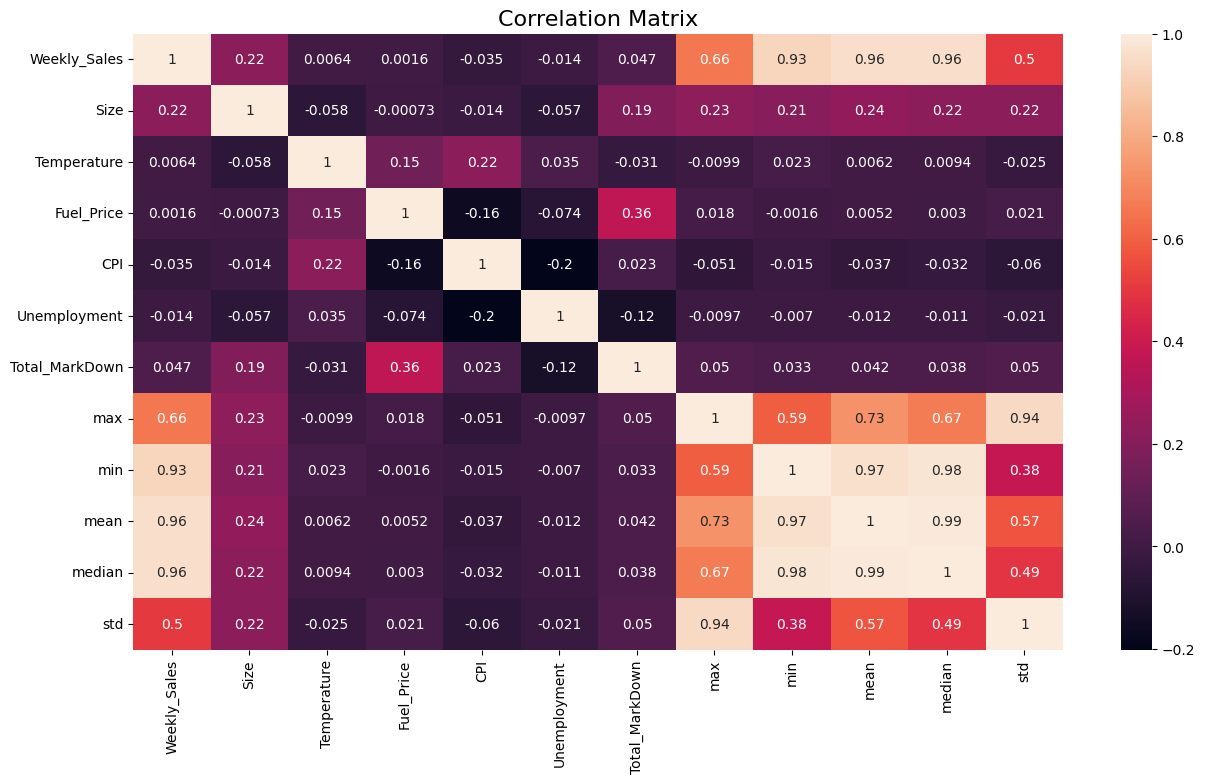

In [ ]:

plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

In [ ]:
data

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,max,min,mean,median,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,57592.12,14537.37,22513.322937,18535.480,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,766.93,-9.92,372.655556,371.050,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,2512.14,110.56,876.629441,824.040,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,11990.43,7414.43,9188.915105,9161.970,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,29166.26,4791.74,8607.050490,7571.600,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,9258.88,202307,69.79,3.506,223.078337,6.170,19679.04,4179.99,9347.725105,8762.990,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,53.12,39690,65.95,4.301,131.193097,10.199,289.78,3.50,37.848679,31.365,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,5339.65,204184,58.99,4.071,142.762411,8.000,41005.33,2524.01,7730.729091,6798.780,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X.shape


(375438, 140)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
X_train.shape


(300350, 140)

In [ ]:

 def create_model():
  model = Sequential()
  model.add(Dense(100,kernel_initializer='normal',activation='relu'))
  model.add(Dense(70, kernel_initializer='normal',activation ='relu'))
  model.add(Dense(64, kernel_initializer='normal',activation ='relu'))
  model.add(Dense(1, kernel_initializer='normal',activation ='linear'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [ ]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

<ipython-input-52-63ac975bdc1f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator_model = KerasRegressor(build_fn=create_model, verbose=1)


In [ ]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

Epoch 1/100
49/49 [==============================] - 13s 198ms/step - loss: 8162.6289 - val_loss: 3877.3506
Epoch 2/100
49/49 [==============================] - 3s 60ms/step - loss: 2545.7134 - val_loss: 2118.1350
Epoch 3/100
49/49 [==============================] - 3s 61ms/step - loss: 2062.2747 - val_loss: 2090.3467
Epoch 4/100
49/49 [==============================] - 3s 55ms/step - loss: 2045.5775 - val_loss: 2108.6702
Epoch 5/100
49/49 [==============================] - 3s 65ms/step - loss: 2034.7637 - val_loss: 2064.1494
Epoch 6/100
49/49 [==============================] - 4s 76ms/step - loss: 2022.8041 - val_loss: 2081.1580
Epoch 7/100
49/49 [==============================] - 3s 55ms/step - loss: 2019.0233 - val_loss: 2047.9335
Epoch 8/100
49/49 [==============================] - 2s 33ms/step - loss: 2009.6691 - val_loss: 2060.5688
Epoch 9/100
49/49 [==============================] - 1s 30ms/step - loss: 2010.0656 - val_loss: 2049.9016
Epoch 10/100
49/49 [========================

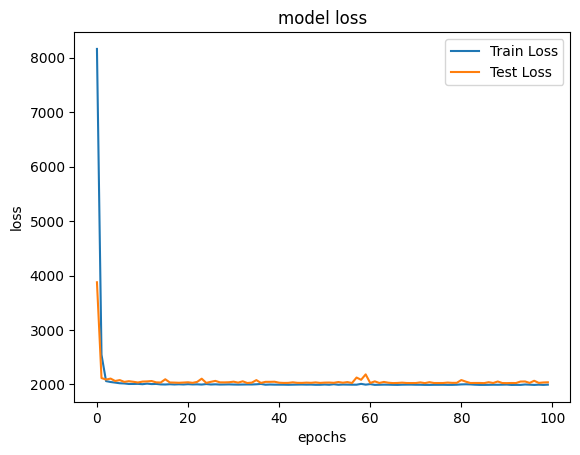

In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
y_pred = estimator_model.predict(X_test)

2347/2347 [==============================] - 4s 2ms/step


In [ ]:
from sklearn import metrics

dnn_acc = metrics.r2_score(y_pred, y_test)
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  0.9025740051145312


In [ ]:
print("MAE : " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE : " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE : " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 : " , metrics.explained_variance_score(y_test, y_pred))

MAE :  2043.7640858149705
MSE :  20624846.864947867
RMSE :  4541.458671500586
R2 :  0.9165493938114632
